In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from src.clustering.kmeans import KMeans_Scratch
from src.metrics.internal import (
    calinski_harabasz_score_scratch,
    davies_bouldin_score_scratch,
    silhouette_score_scratch,
    calculate_wcss
)
from src.metrics.external import confusion_matrix_scratch,purity_score_scratch,entropy_scratch,normalized_mutual_information_scratch,adjusted_rand_index_scratch

 


In [3]:
import pandas as pd

df=pd.read_csv('D:\K_means-GMM-Pca-AutoEncoder_From_Scratch\data.csv')

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.drop(columns=['Unnamed: 32'],inplace=True)

In [7]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df.drop(columns=['id'],inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum().sum()

0

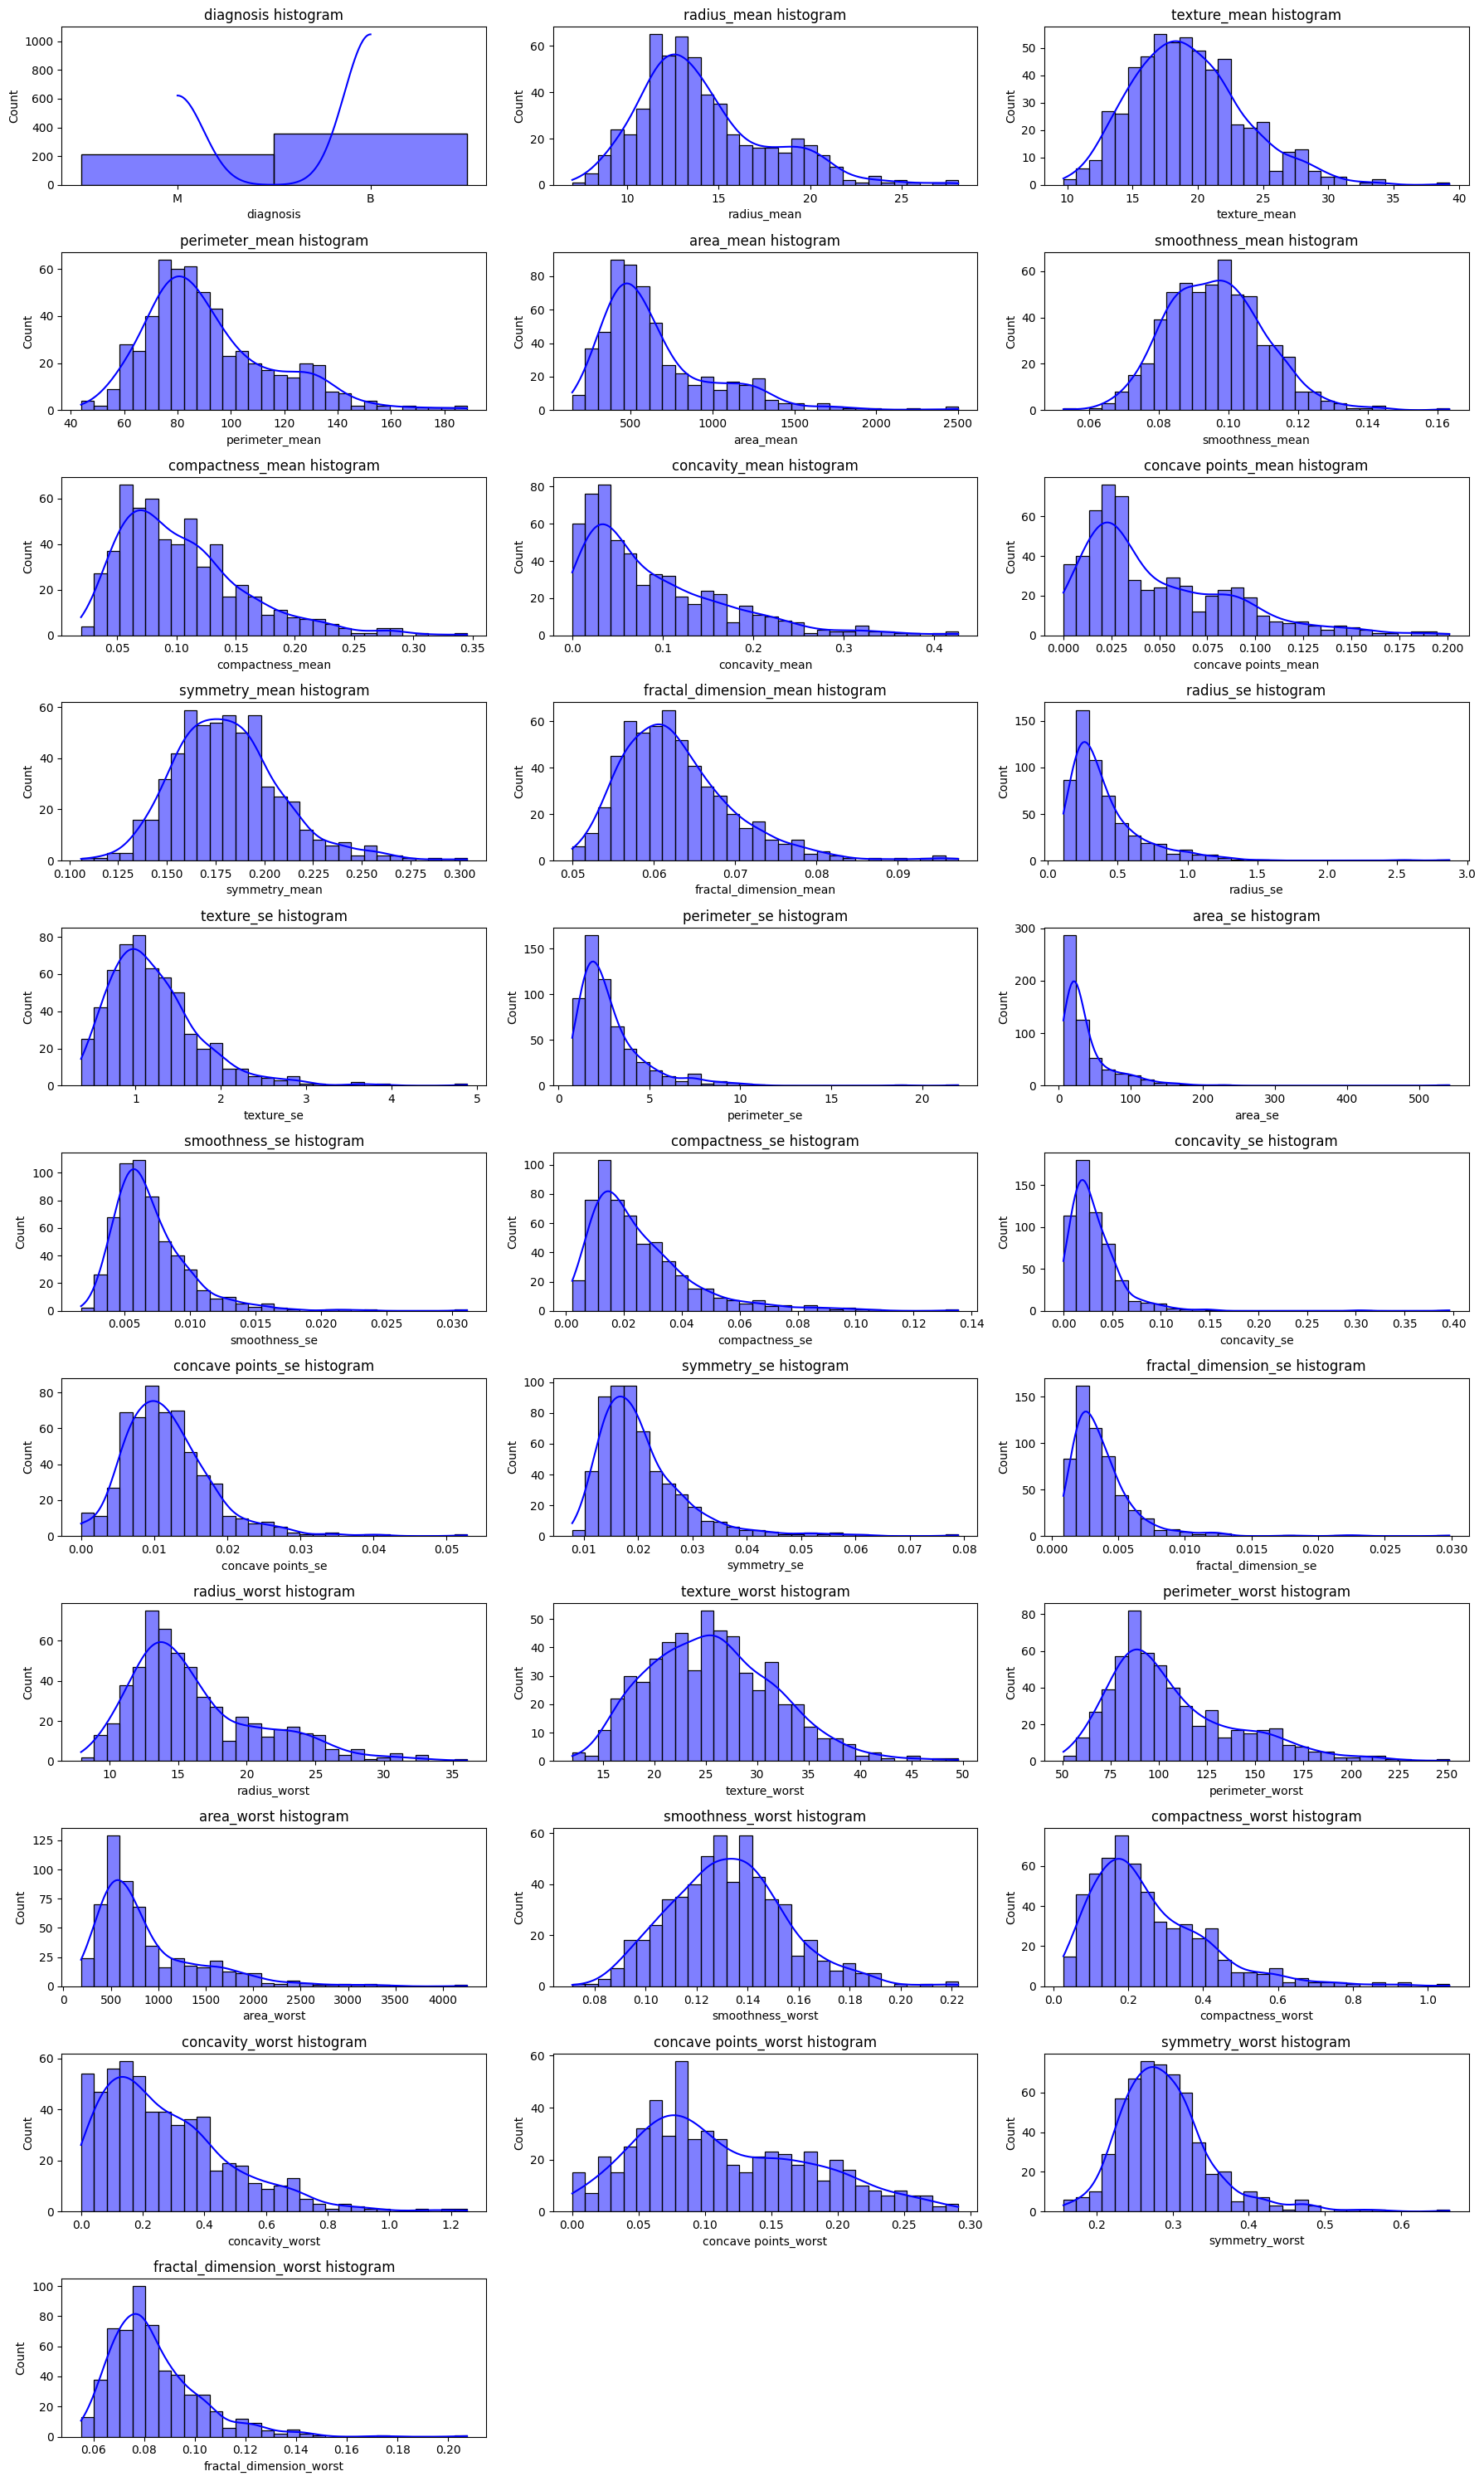

In [11]:
plt.figure(figsize=(18, 30))

for i, bf in enumerate(df.columns):
    plt.subplot(11, 3, i+1)
    sns.histplot(x=bf, data=df, kde=True, color='blue', bins=30)

    plt.title(f'{bf} histogram')
plt.tight_layout()
plt.show()

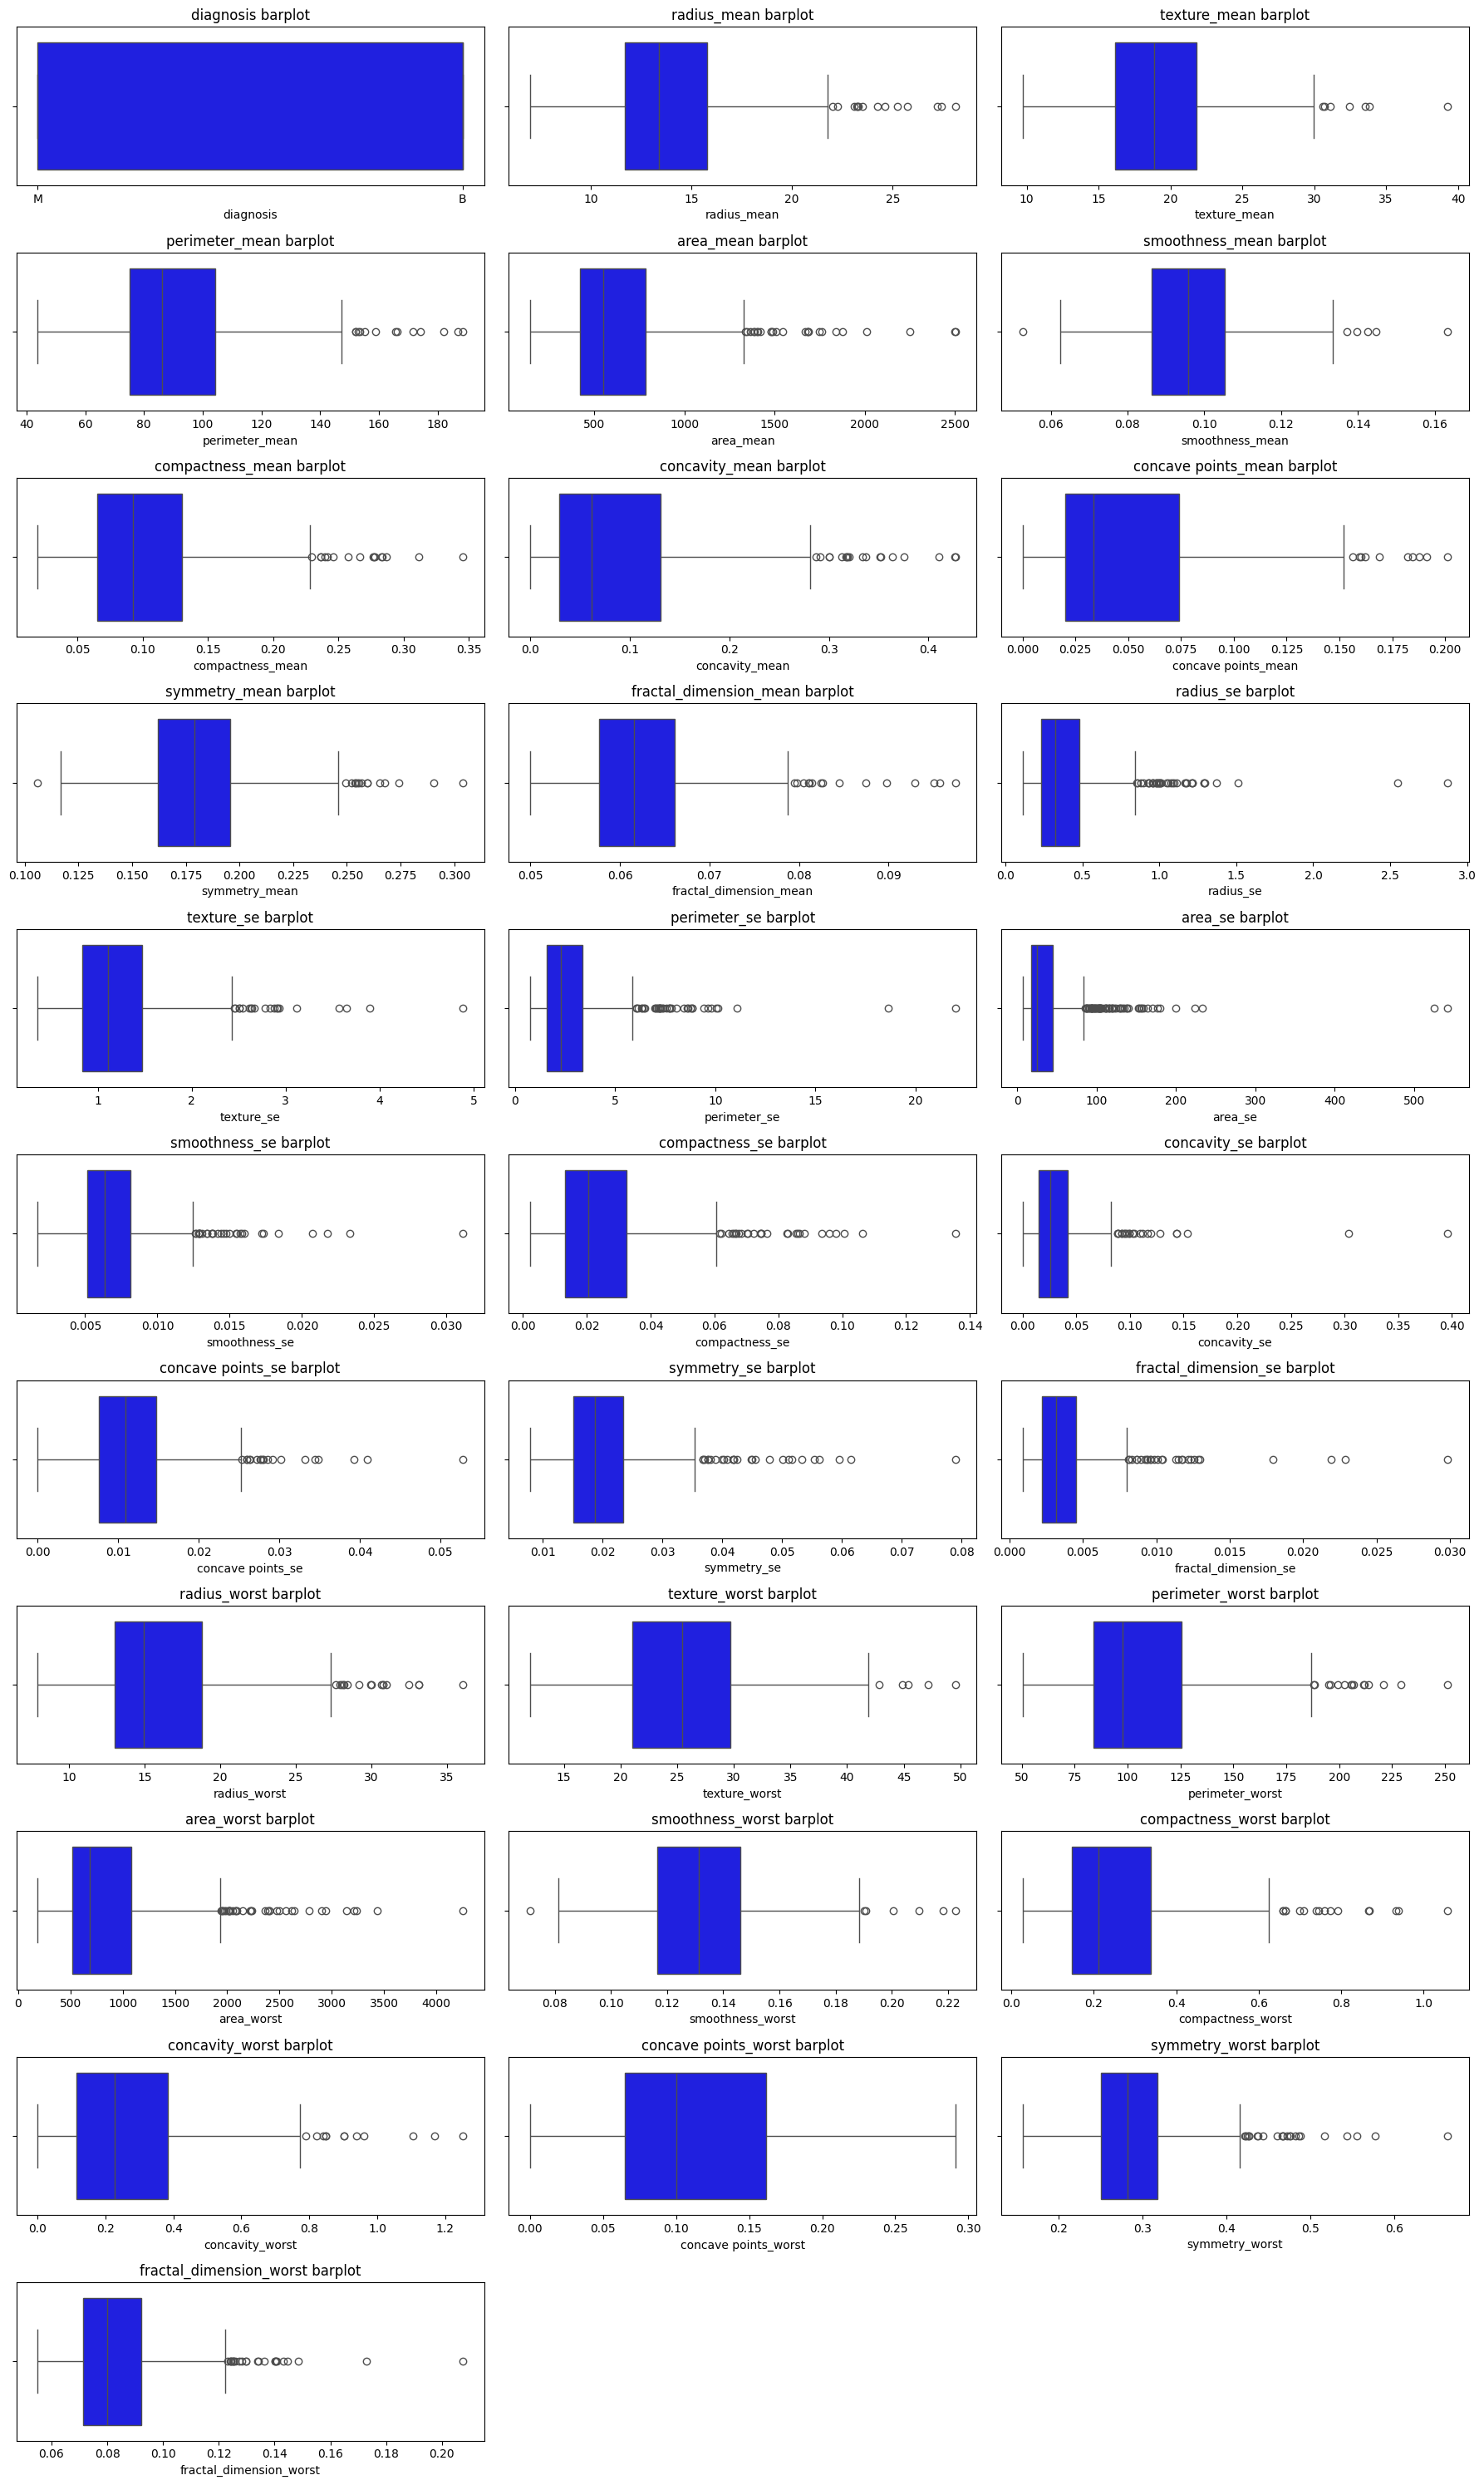

In [12]:
plt.figure(figsize=(18, 30))
for i, bf in enumerate(df.columns):
    plt.subplot(11, 3, i+1)
    sns.boxplot(x=bf, data=df,  color='blue')

    plt.title(f'{bf} barplot')
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

y = df["diagnosis"].map({"M": 1, "B": 0}).values

# Drop diagnosis
X = df.drop(columns=["diagnosis"]).values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




### Expirement 1 

In [21]:
k_values = range(2, 11)
wcss_random = []
wcss_kpp = []

for k in k_values:
    km_random = KMeans_Scratch(n_clusters=k, init_method="random")
    km_random.fit(X_scaled)
    wcss_random.append(km_random.inertia_)
    
    km_kpp = KMeans_Scratch(n_clusters=k, init_method="kmeans++")
    km_kpp.fit(X_scaled)
    wcss_kpp.append(km_kpp.inertia_)

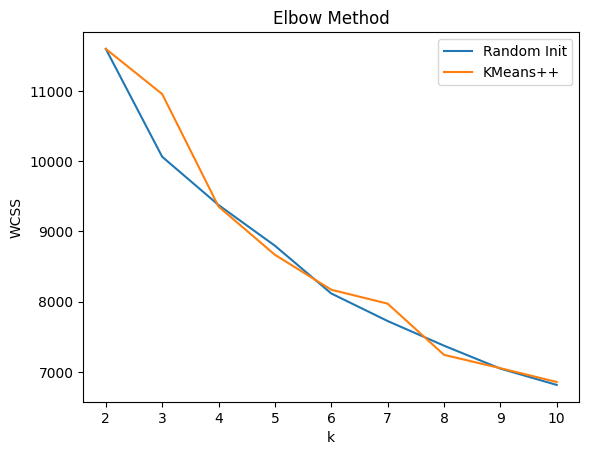

In [22]:
import matplotlib.pyplot as plt

plt.plot(k_values, wcss_random, label="Random Init")
plt.plot(k_values, wcss_kpp, label="KMeans++")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.legend()
plt.show()


In [23]:
from src.metrics.internal import (
    silhouette_score_scratch,
    davies_bouldin_score_scratch,
    calinski_harabasz_score_scratch
)
internal_results = []

for k in k_values:
    model = KMeans_Scratch(n_clusters=k, init_method="kmeans++")
    model.fit(X_scaled)
    labels = model.labels_

    internal_results.append({
        "k": k,
        "silhouette": silhouette_score_scratch(X_scaled, labels),
        "davies_bouldin": davies_bouldin_score_scratch(X_scaled, labels),
        "calinski_harabasz": calinski_harabasz_score_scratch(X_scaled, labels),
        "wcss": model.inertia_
    })


def gap_statistic(X, k, B=10):
    model = KMeans_Scratch(n_clusters=k)
    model.fit(X)
    wcss_real = model.inertia_

    wcss_rand = []
    for _ in range(B):
        X_rand = np.random.uniform(
            low=X.min(axis=0),
            high=X.max(axis=0),
            size=X.shape
        )
        km = KMeans_Scratch(n_clusters=k)
        km.fit(X_rand)
        wcss_rand.append(km.inertia_)

    return np.mean(np.log(wcss_rand)) - np.log(wcss_real)


In [24]:
km_random = KMeans_Scratch(k, init_method="random")
km_random.fit(X_scaled)

km_kpp = KMeans_Scratch(k, init_method="kmeans++")
km_kpp.fit(X_scaled)

print("Random iters:", len(km_random.inertia_history))
print("KMeans++ iters:", len(km_kpp.inertia_history))


Random iters: 27
KMeans++ iters: 27


In [ ]:
labels = km_kpp.labels_
ARI = adjusted_rand_index_scratch(y, labels)
NMI = normalized_mutual_information_scratch(y, labels)
Purity = purity_score_scratch(y, labels)


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, labels)


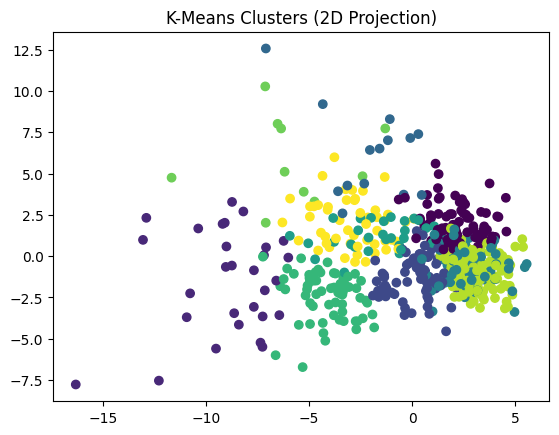

In [29]:
from src.dimensionality_reduction.pca import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

plt.scatter(X_2d[:,0], X_2d[:,1], c=labels)
plt.title("K-Means Clusters (2D Projection)")
plt.show()
